In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data/la_stu_3.xlsx')
df.head()

,student_id,lastname,firstname,lastname_long,firstname_long,Contract date,Course end date,Contract number,status,Contract line number,Subject/test/product name,Number of lessons after discount,Remaining number of courses,skill,level
0,L0603207052,吉田,正敏,ヨシダ,マサトシ,2020-08-28,2023-02-16,K02018365,5：受講修了,KM13604720,【販売停止】【e-text】English Advantage Ｌｅｖｅｌ 2,32,0,General English,Level 2
1,L0603207052,吉田,正敏,ヨシダ,マサトシ,2020-08-28,2023-02-16,K02018365,5：受講修了,KM13604723,【販売停止】【e-text】English Advantage Ｌｅｖｅｌ 3,32,0,General English,Level 3
2,L0603207052,吉田,正敏,ヨシダ,マサトシ,2020-08-28,2023-02-16,K02018365,5：受講修了,KM13604708,【販売停止】【e-text】【BC】English Advantage Ｌｅｖｅｌ 1,32,0,General English,Level 1
3,L0603207052,吉田,正敏,ヨシダ,マサトシ,2020-12-23,NaT,K02094135,1：契約確定,KM14580085,【販売停止】ロゼッタストーンTOEIC(R) 450点講座,44,1,TOEIC skills,Building
4,L0603207052,吉田,正敏,ヨシダ,マサトシ,2022-07-30,2023-10-12,K02440024,5：受講修了,KM18860131,【e-text】English Advantage Ｌｅｖｅｌ 3,32,0,General English,Level 3


# Add english status

In [3]:
# English version of status codes
english_status = {
    '1：契約確定': 'Contract confirmed',
    '2：仮解約': 'Provisional cancellation',
    '3：解約確定': 'Cancellation confirmed',
    '4：契約満了': 'Contract expiration',
    '5：受講修了': 'Course completion',
    '6：休会': 'Adjournment'
}

# Map Japanese status to English while grouping
df['en_status'] = df['status'].map(english_status)
print(df.head());

    student_id lastname firstname lastname_long firstname_long Contract date  \
0  L0603207052       吉田        正敏           ヨシダ           マサトシ    2020-08-28   
1  L0603207052       吉田        正敏           ヨシダ           マサトシ    2020-08-28   
2  L0603207052       吉田        正敏           ヨシダ           マサトシ    2020-08-28   
3  L0603207052       吉田        正敏           ヨシダ           マサトシ    2020-12-23   
4  L0603207052       吉田        正敏           ヨシダ           マサトシ    2022-07-30   

  Course end date Contract number  status Contract line number  \
0      2023-02-16       K02018365  5：受講修了           KM13604720   
1      2023-02-16       K02018365  5：受講修了           KM13604723   
2      2023-02-16       K02018365  5：受講修了           KM13604708   
3             NaT       K02094135  1：契約確定           KM14580085   
4      2023-10-12       K02440024  5：受講修了           KM18860131   

                     Subject/test/product name  \
0      【販売停止】【e-text】English Advantage Ｌｅｖｅｌ 2   
1      【販売停止】【e-text】E

# Fill empty course end date

In [4]:
print(df['Course end date'].isna().sum())

1338


In [5]:
df['Course end date'].fillna('1990-01-01', inplace=True)
print(df.head())

    student_id lastname firstname lastname_long firstname_long Contract date  \
0  L0603207052       吉田        正敏           ヨシダ           マサトシ    2020-08-28   
1  L0603207052       吉田        正敏           ヨシダ           マサトシ    2020-08-28   
2  L0603207052       吉田        正敏           ヨシダ           マサトシ    2020-08-28   
3  L0603207052       吉田        正敏           ヨシダ           マサトシ    2020-12-23   
4  L0603207052       吉田        正敏           ヨシダ           マサトシ    2022-07-30   

  Course end date Contract number  status Contract line number  \
0      2023-02-16       K02018365  5：受講修了           KM13604720   
1      2023-02-16       K02018365  5：受講修了           KM13604723   
2      2023-02-16       K02018365  5：受講修了           KM13604708   
3      1990-01-01       K02094135  1：契約確定           KM14580085   
4      2023-10-12       K02440024  5：受講修了           KM18860131   

                     Subject/test/product name  \
0      【販売停止】【e-text】English Advantage Ｌｅｖｅｌ 2   
1      【販売停止】【e-text】E

In [6]:
unique_status = df['status'].unique()
print(unique_status)

['5：受講修了' '1：契約確定' '4：契約満了' '3：解約確定' '6：休会' '2：仮解約']


# Filter active users only

In [11]:
from datetime import datetime

# Get current month
current_month = datetime.now().strftime('%Y-%m')
print(current_month)

df['month'] = df['Course end date'].dt.to_period('M')

print(df['month'].head())

filtered_active_users = df[(df['status'].str.contains('1：契約確定')) | (df['month'] >= current_month)]
print(filtered_active_users.head()[['student_id','Course end date','month','en_status']])

2024-03
0    2023-02
1    2023-02
2    2023-02
3    1990-01
4    2023-10
Name: month, dtype: period[M]
     student_id Course end date    month           en_status
3   L0603207052      1990-01-01  1990-01  Contract confirmed
5   L0603207052      1990-01-01  1990-01  Contract confirmed
9   L0603209675      1990-01-01  1990-01  Contract confirmed
25  L0603209860      1990-01-01  1990-01  Contract confirmed
26  L0603209860      1990-01-01  1990-01  Contract confirmed


# Count Unique enrolled Users

In [12]:

unique_enroll_users = filtered_active_users['student_id'].unique()
print(len(unique_enroll_users))

573


# filter by product

In [13]:
filtered_be_df = filtered_active_users[filtered_active_users['Subject/test/product name'].str.contains('Business Edge')]
filtered_be_df.to_csv('output/business_edge.csv', index=False)

filtered_ea_df = df[df['Subject/test/product name'].str.contains('English Advantage')]
filtered_ea_df.to_csv('output/english_advantage.csv', index=False)

# Export to CSV

In [ ]:
active_users_df = pd.DataFrame(filtered_active_users)

# Export to CSV
active_users_df.to_csv('output/active_users.csv', index=False)

# Group By Status

In [98]:
enrolled_students_by_status = filtered_active_users.groupby('en_status')['student_id'].unique()
print(enrolled_students_by_status)

en_status
Contract confirmed    [L0603207052, L0603209675, L0603209860, L11052...
Name: student_id, dtype: object


In [99]:
enrolled_students_counts_by_status = enrolled_students_by_status.apply(len)
print(enrolled_students_counts_by_status)

en_status
Contract confirmed    573
Name: student_id, dtype: int64


# Enrolled student distribution in Graph by contract status

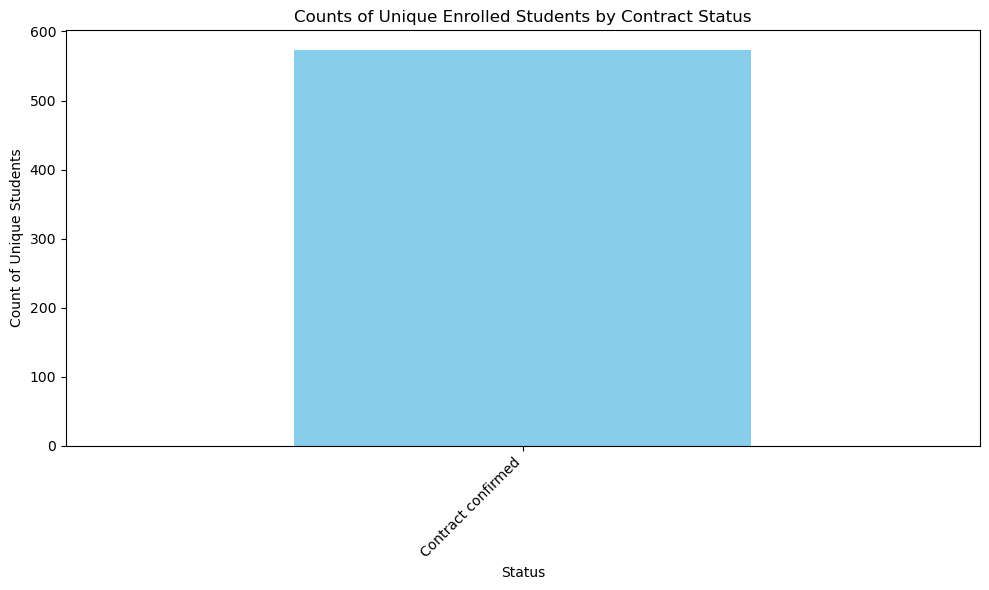

In [100]:
## Plot the graph
plt.figure(figsize=(10, 6))
enrolled_students_counts_by_status.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Status')
plt.ylabel('Count of Unique Students')
plt.title('Counts of Unique Enrolled Students by Contract Status')

# Show plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Export to csv

In [101]:
print(filtered_active_users.head()[['student_id', 'firstname', 'lastname', 'Course end date','month','en_status','Subject/test/product name','skill','level']])

     student_id firstname lastname Course end date    month  \
3   L0603207052        正敏       吉田      1990-01-01  1990-01   
5   L0603207052        正敏       吉田      1990-01-01  1990-01   
9   L0603209675       佳寿子       山下      1990-01-01  1990-01   
25  L0603209860        宣光       浅井      1990-01-01  1990-01   
26  L0603209860        宣光       浅井      1990-01-01  1990-01   

             en_status          Subject/test/product name            skill  \
3   Contract confirmed      【販売停止】ロゼッタストーンTOEIC(R) 450点講座     TOEIC skills   
5   Contract confirmed  【e-text】English Advantage Ｌｅｖｅｌ 4  General English   
9   Contract confirmed  【e-text】English Advantage Ｌｅｖｅｌ 6  General English   
25  Contract confirmed  【e-text】English Advantage Ｌｅｖｅｌ 6  General English   
26  Contract confirmed            ロゼッタストーンTOEIC(R) 850点講座     TOEIC skills   

        level  
3    Building  
5     Level 4  
9     Level 6  
25    Level 6  
26  Mastering  


In [102]:
# Convert unique values array to a DataFrame
# filtered_avtive_df = filtered_active_users[filtered_active_users['student_id'].isin(unique_enroll_users)]

active_users_df = pd.DataFrame(filtered_active_users)

# Export to CSV
active_users_df.to_csv('output/active_users.csv', index=False)

# Overall data grouping by contract status

In [32]:
unique_students_by_status = df.groupby('en_status')['student_id'].unique()
# print(unique_students_by_status)

In [33]:
unique_students_counts_by_status = unique_students_by_status.apply(len)
print(unique_students_counts_by_status)

en_status
Adjournment                  12
Cancellation confirmed      229
Contract confirmed          573
Contract expiration         136
Course completion           690
Provisional cancellation     14
Name: student_id, dtype: int64


# Graph for over all distribution by contract status

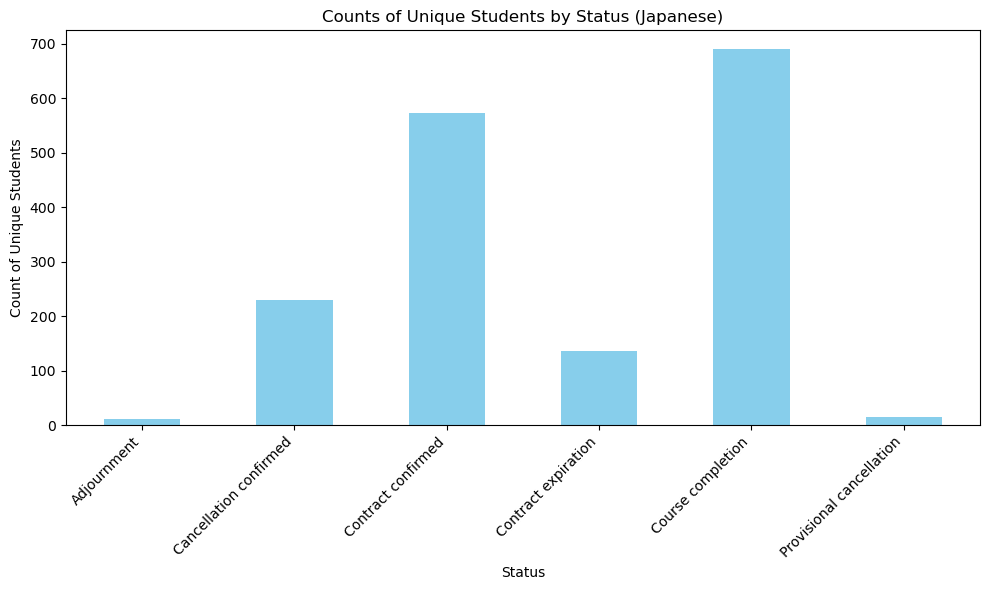

In [34]:


## Plot the graph
plt.figure(figsize=(10, 6))
unique_students_counts_by_status.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Status')
plt.ylabel('Count of Unique Students')
plt.title('Counts of Unique Students by Contract Status')

# Show plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [42]:
unique_values = df['Subject/test/product name'].unique()
print(unique_values)

['科目・検定・商品名' '【販売停止】【e-text】English Advantage Ｌｅｖｅｌ 2'
 '【販売停止】【e-text】English Advantage Ｌｅｖｅｌ 3'
 '【販売停止】【e-text】【BC】English Advantage Ｌｅｖｅｌ 1'
 '【販売停止】ロゼッタストーンTOEIC(R) 450点講座' '【e-text】English Advantage Ｌｅｖｅｌ 3'
 '【e-text】English Advantage Ｌｅｖｅｌ 4' '【e-text】English Advantage Ｌｅｖｅｌ 5'
 '【e-text】English Advantage Ｌｅｖｅｌ 6' 'English Advantage 演習 2回'
 'ロゼッタストーンTOEIC(R) 450点講座' 'ロゼッタストーンTOEIC (R) 演習5回'
 'ロゼッタストーンTOEIC(R) 650点講座' 'ロゼッタストーンTOEIC(R) 850点講座'
 'ロゼッタストーンTOEIC (R) 演習3回' '【e-text】【BC】English Advantage Ｌｅｖｅｌ 1'
 '【販売停止】【e-text】English Advantage Foundation' 'Business Edge Book3'
 'Business Edge Book2' 'RS Business English Foundation'
 '【e-text】English Advantage Ｌｅｖｅｌ 2' 'RS English Book 1'
 'RS English Book 2' 'RS English Book 3' 'Market Leader Intermediate'
 'Business Edge Book4' 'Business Edge Book6' 'Business Edge Book5'
 '【販売停止】【e-text】English Advantage Ｌｅｖｅｌ 6'
 '【販売停止】【e-text】English Advantage Ｌｅｖｅｌ 7' 'RS English Book 4'
 '【e-text】English Advantage Ｌｅｖｅｌ 7' 'English Advantage

In [11]:
# Convert unique values array to a DataFrame
unique_values_df = pd.DataFrame(unique_values, columns=['Unique Values'])

# Export to CSV
unique_values_df.to_csv('output/unique_values.csv', index=False)

In [ ]:
count = df['Subject/test/product name'].value_counts()
print(count)

In [9]:
# Count the number of unique values
num_unique_values = len(unique_values)

# Print the count
print("Number of unique values:", num_unique_values)

Number of unique values: 155


In [10]:
filtered_df = df[df['Subject/test/product name'].str.contains('Business Edge')]
filtered_df.to_csv('output/business_edge.csv', index=False)
# Print the filtered DataFrame
print(filtered_df)

       student_id lastname firstname lastname_long firstname_long  \
30    L0704201328        秦        英明            ハタ           ヒデアキ   
31    L0704201328        秦        英明            ハタ           ヒデアキ   
32    L0704201328        秦        英明            ハタ           ヒデアキ   
33    L0704201328        秦        英明            ハタ           ヒデアキ   
35    L1105200352       阿部        新平            アベ           シンペイ   
...           ...      ...       ...           ...            ...   
3371  L2401805242       冨岡        孝仁          トミオカ           タカヒト   
3376  L2401806196       細田         圭           ホソダ             ケイ   
3379  L2401806509       平本        貴之          ヒラモト           タカユキ   
3380  L2401806509       平本        貴之          ヒラモト           タカユキ   
3381  L2401806657       西岡        大貴          ニシオカ            ヒロキ   

     Contract date Course end date Contract number  status  \
30      2022-07-31      2023-01-24       K02440675  3：解約確定   
31      2022-12-16      2023-01-24       K02503

In [15]:
filtered_df_av = df[df['Subject/test/product name'].str.contains('English Advantage')]
filtered_df_av.to_csv('output/english_advantage.csv', index=False)

In [76]:
# unique_students = df['student_id'].unique()
# Get unique combinations of 'student_id' and 'firstname'
unique_students = df[['student_id', 'firstname','lastname']].drop_duplicates()
num_unique_students = len(unique_students)

# Print the count
print("Number of unique users:", num_unique_students)
print(unique_students.head())

Number of unique users: 1351
     student_id firstname lastname
0         受講生番号         名        姓
1   L0603207052        正敏       吉田
7   L0603209675       佳寿子       山下
11  L0603209860        宣光       浅井
28  L0604203283        晴望       平野


In [80]:
def generate_email(student_id):
    domain = 'globalenglishcampus.com'  # Replace 'example.com' with your desired domain
    return f"{student_id}@{domain}"


# Apply the function to generate emails for each student number and store them in the DataFrame
unique_students['Email'] = unique_students['student_id'].apply(generate_email)

# Print the updated DataFram
print(unique_students.head())
print(unique_students.tail())

     student_id firstname lastname                                Email
0         受講生番号         名        姓        受講生番号@globalenglishcampus.com
1   L0603207052        正敏       吉田  L0603207052@globalenglishcampus.com
7   L0603209675       佳寿子       山下  L0603209675@globalenglishcampus.com
11  L0603209860        宣光       浅井  L0603209860@globalenglishcampus.com
28  L0604203283        晴望       平野  L0604203283@globalenglishcampus.com
       student_id firstname lastname                                Email
3378  L2401806456        りえ       坂本  L2401806456@globalenglishcampus.com
3380  L2401806509        貴之       平本  L2401806509@globalenglishcampus.com
3382  L2401806657        大貴       西岡  L2401806657@globalenglishcampus.com
3383  L2401807427        都月       福井  L2401807427@globalenglishcampus.com
3384  L2401807602       真寿美       西村  L2401807602@globalenglishcampus.com


In [81]:
selected_df = unique_students.drop_duplicates()
selected_df = selected_df.dropna(subset=['Email'])


In [82]:

selected_df.to_csv('output/students_list.csv', index=False)

In [65]:
num_selected_columns_df = len(selected_df)

# Print the count
print("Number of unique users:", num_selected_columns_df)

Number of unique users: 1351
